<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [6]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = """
SELECT * FROM master
"""
df=pd.read_sql_query(QUERY,conn)

# check for duplicates
print(len(df))
dupe_rows=df[df.duplicated()]
print(len(dupe_rows))


11398
0


In [8]:
# ConvertedComp query, df creation, determining # of cells missing data
QUERY = """
SELECT ConvertedComp FROM master
"""
df_comp=pd.read_sql_query(QUERY,conn)

df_comp.isnull().value_counts()


ConvertedComp
False            10582
True               816
dtype: int64

In [9]:
# review min/max/quartile info to determine how to best handle missing values
# 'mode' calculates to the max value, however that would to severely skew the data at the high end
# seeking alternatives

df_comp.describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


In [10]:
# using the mean seems reasonable as median is too low and mode is too high
# replace missing values with the mean
mean=df_comp.mean()
df_comp.replace(np.nan, mean, inplace=True)


In [11]:
#confirm replacement success
df_comp.isnull().value_counts()

ConvertedComp
False            11398
dtype: int64

In [12]:
# identify outliers
def find_outliers_iqr(df):
    q25=df.quantile(0.25)
    q75=df.quantile(0.75)
    iqr=q75-q25

    outliers = df[((df<(q25-1.5*iqr)) | (df>(q75+1.5*iqr)))]

    return outliers

outliers=find_outliers_iqr(df_comp['ConvertedComp'])
print(len(outliers))



811


In [13]:
#cap outliers
def limit_outliers(df):
    upper_limit = df.mean() + 3*df.std()

    lower_limit = df.mean() - 3*df.std()

    return lower_limit, upper_limit

limit_outliers(df_comp['ConvertedComp'])





(-720515.7989262148, 983709.2621656811)

In [14]:
#replace outliers with limits
upper_limit=983709.26
lower_limit=-720515.80

df_comp['ConvertedComp'] = np.where(df_comp['ConvertedComp'] > upper_limit,

   upper_limit,

   np.where(df_comp['ConvertedComp'] < lower_limit,

    lower_limit,

    df_comp['ConvertedComp']))

In [15]:
# NP hist function to ensure bins align w/horiz tick marks
bin_edges=np.linspace(min(df_comp['ConvertedComp']), max(df_comp['ConvertedComp']), 6)


Text(0.5, 1.0, 'Converted Annual Compensation')

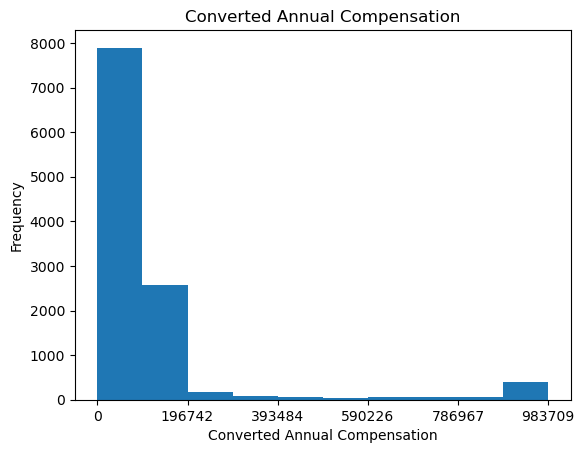

In [16]:
df_comp.plot(kind='hist', legend=None, xticks=bin_edges)

plt.xlabel('Converted Annual Compensation')
plt.title('Converted Annual Compensation')

### Box Plots


Plot a box plot of `Age.`


In [17]:
# query
QUERY = """
SELECT Age FROM master
"""
df_age=pd.read_sql_query(QUERY,conn)

# determine missing values
df_age.isnull().value_counts()


Age  
False    11111
True       287
dtype: int64

In [18]:
df_age['Age'].describe()

count    11111.000000
mean        30.779318
std          7.393680
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [19]:
# remove missing values & confirm success
df_age.dropna(inplace=True)
df_age.isnull().value_counts()

Age  
False    11111
dtype: int64

In [20]:
#id outliers
find_outliers_iqr(df_age['Age'])
print(len(outliers))

811


In [21]:
#limit outliers
limit_outliers(df_age['Age'])

(8.598277274048915, 52.96035831230695)

In [21]:
#replace outliers with limits
upper_limit=55
lower_limit=8.6

df_age['Age'] = np.where(df_age['Age'] > upper_limit,

   upper_limit,

   np.where(df_age['Age'] < lower_limit,

    lower_limit,

    df_age['Age']))

Text(0.5, 1.0, 'Age of Survey Respondents')

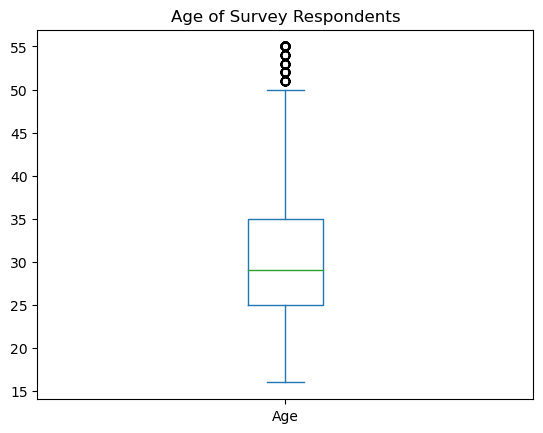

In [22]:
#plot

df_age.plot(kind="box")
plt.title('Age of Survey Respondents')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [23]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
"""
df_sct=pd.read_sql_query(QUERY,conn)

# id # of missing vals
df_sct.isnull().value_counts()


Age    WorkWeekHrs  CodeRevHrs
False  False        False         8669
                    True          2331
True   False        False          212
False  True         False           84
True   False        True            64
False  True         True            27
True   True         False            7
                    True             4
dtype: int64

In [24]:
df_sct.describe()

,Age,WorkWeekHrs,CodeRevHrs
count,11111.000000,11276.000000,8972.000000
mean,30.779318,42.064606,4.781071
std,7.393680,24.672741,4.567060
min,16.000000,3.000000,0.000000
25%,25.000000,40.000000,2.000000
50%,29.000000,40.000000,4.000000
75%,35.000000,43.000000,5.000000
max,99.000000,1012.000000,99.000000


In [25]:
#replace missing WorkWeekHrs with mean & confirm replacement
mean=df_sct['WorkWeekHrs'].mean()
df_sct['WorkWeekHrs'].replace(np.nan, mean, inplace=True)
df_sct.isnull().value_counts()

Age    WorkWeekHrs  CodeRevHrs
False  False        False         8753
                    True          2358
True   False        False          219
                    True            68
dtype: int64

In [26]:
#replace missing CodeRevHrs with mean & confirm replacement
mean=df_sct['CodeRevHrs'].mean()
df_sct['CodeRevHrs'].replace(np.nan, mean, inplace=True)
df_sct.isnull().value_counts()

Age    WorkWeekHrs  CodeRevHrs
False  False        False         11111
True   False        False           287
dtype: int64

In [27]:
# drop row missing age & confirm success
df_sct.dropna(inplace=True)
df_sct.isnull().value_counts()

Age    WorkWeekHrs  CodeRevHrs
False  False        False         11111
dtype: int64

In [28]:
# cap Age outliers with limits

upper_limit=55
lower_limit=8.6

df_sct['Age'] = np.where(df_sct['Age'] > upper_limit,

   upper_limit,

   np.where(df_sct['Age'] < lower_limit,

    lower_limit,

    df_sct['Age']))

In [29]:
# id WorkWeekHrs outliers
limit_outliers(df_sct['WorkWeekHrs'])

(-32.326273380787725, 116.55126146341051)

In [30]:
# id CodeRevHrs outliers
limit_outliers(df_sct['CodeRevHrs'])

(-6.980023683389622, 16.496725272384708)

In [31]:
# cap WorkWeekHrs outliers with limits
upper_limit=116.93
lower_limit=-32.7

df_sct['WorkWeekHrs'] = np.where(df_sct['WorkWeekHrs'] > upper_limit,

   upper_limit,

   np.where(df_sct['WorkWeekHrs'] < lower_limit,

    lower_limit,

    df_sct['WorkWeekHrs']))

In [32]:
# cap CodeRevHrs outliers with limits
upper_limit=16.33
lower_limit=-6.85

df_sct['CodeRevHrs'] = np.where(df_sct['CodeRevHrs'] > upper_limit,

   upper_limit,

   np.where(df_sct['CodeRevHrs'] < lower_limit,

    lower_limit,

    df_sct['CodeRevHrs']))

Text(0.5, 1.0, 'Relationship of Work Week Hours by Age')

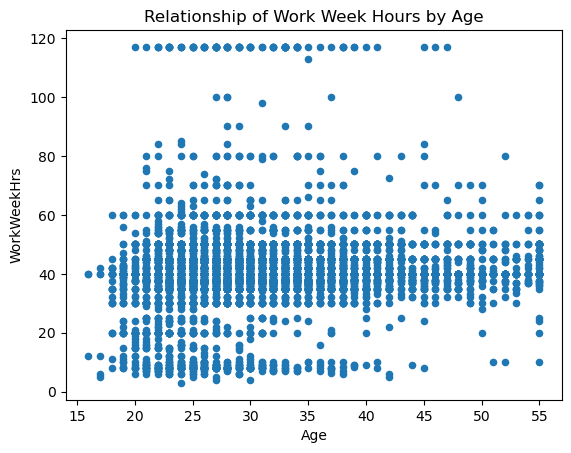

In [33]:

df_sct.plot(kind='scatter', x='Age', y='WorkWeekHrs')
plt.title('Relationship of Work Week Hours by Age')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

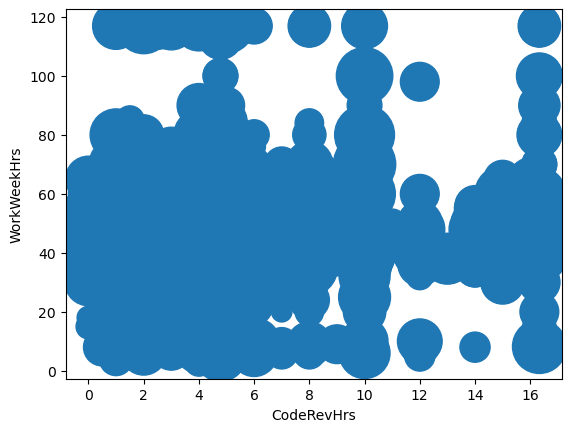

In [40]:
#normalize Age column
#normalize Age column
norm_CodeRevHrs = (df_sct['Age'] - df_sct['Age'].min()) / (df_sct['Age'].max() - df_sct['Age'].min()) 
df_sct.plot.scatter(x = 'CodeRevHrs', y = 'WorkWeekHrs', s = norm_CodeRevHrs* 2000 + 10 )
          



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


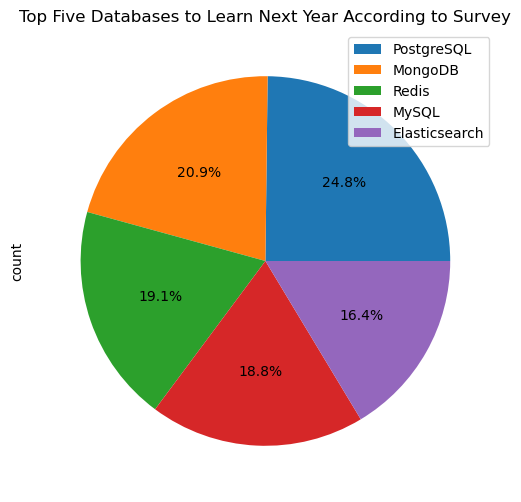

In [43]:
# your code goes here

QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc

"""
df_dbwant=pd.read_sql_query(QUERY,conn)
df_dbwant=df_dbwant.head()
df_dbwant

df_dbwant['count'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', labels=None)
plt.title('Top Five Databases to Learn Next Year According to Survey')
plt.legend(labels=df_dbwant['DatabaseDesireNextYear'], loc='upper right')



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0, 0.5, 'Hours')

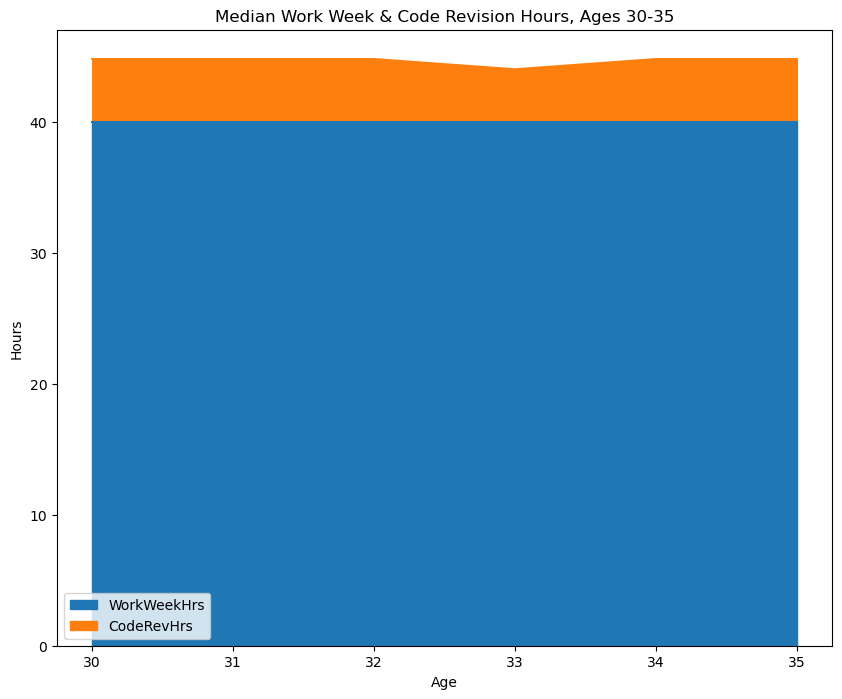

In [46]:
# query

df_stack=df_sct[(df_sct['Age']>=30)&(df_sct['Age']<=35)]


df_stack=df_stack.groupby(['Age'], as_index=True).median()
df_stack

df_stack.plot(kind='area', figsize=(10,8))
plt.title('Median Work Week & Code Revision Hours, Ages 30-35')
plt.xlabel('Age')
plt.ylabel('Hours')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [47]:

# query
QUERY = """
SELECT Age, ConvertedComp FROM master
WHERE AGE Between 45 and 60
Order by Age
"""
df_agecomp=pd.read_sql_query(QUERY,conn)
df_agecomp

#check for Nan
df_agecomp.isnull().value_counts()

Age    ConvertedComp
False  False            561
       True              38
dtype: int64

In [48]:
# replace missing values with the mean
mean=df_agecomp['ConvertedComp'].mean()
df_agecomp['ConvertedComp'].replace(np.nan, mean, inplace=True)

#check for Nan
df_agecomp.isnull().value_counts()

Age    ConvertedComp
False  False            599
dtype: int64

In [49]:
df_agecomp=df_agecomp.groupby(['Age'], as_index=True).median()
df_agecomp

,ConvertedComp
Age,
45.0,94210.0
46.0,103500.0
47.0,93746.0
48.0,108250.0
49.0,89520.0
50.0,95000.0
51.0,108423.0
52.0,106044.0
53.0,107754.5


Text(0, 0.5, 'Compensation')

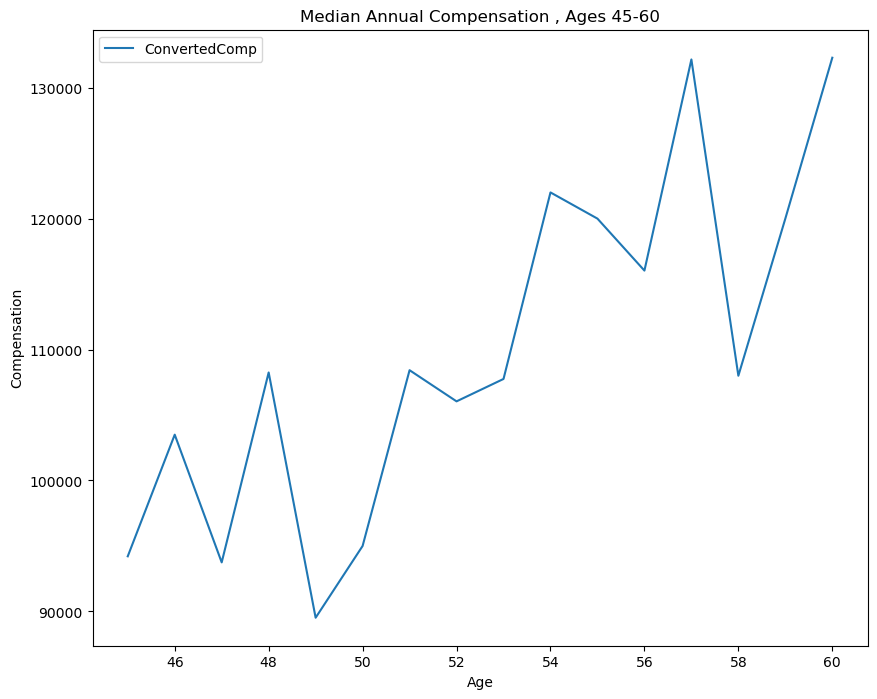

In [50]:
df_agecomp.plot(kind='line', figsize=(10,8))
plt.title('Median Annual Compensation , Ages 45-60')
plt.xlabel('Age')
plt.ylabel('Compensation')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [51]:
# your code goes here
QUERY = """
SELECT MainBranch from master

"""
df_dev=pd.read_sql_query(QUERY,conn)
df_dev=df_dev.groupby('MainBranch')['MainBranch'].count()
df_dev

MainBranch
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

<AxesSubplot:ylabel='MainBranch'>

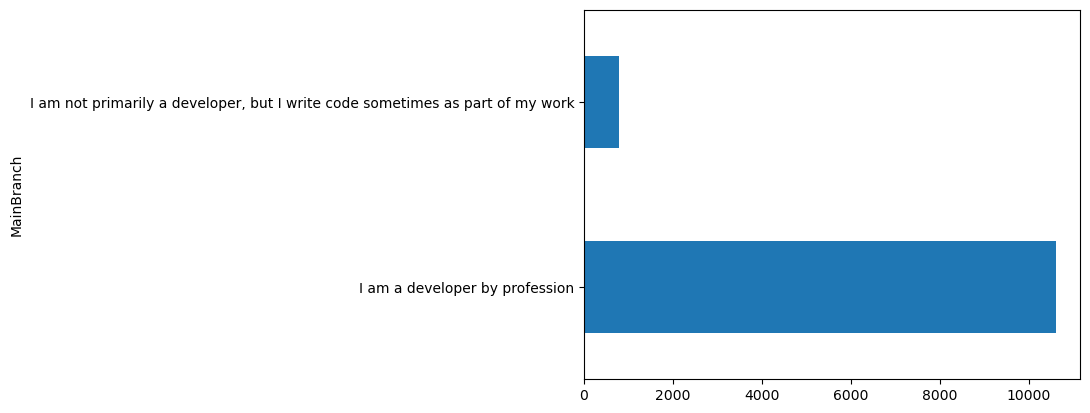

In [52]:
df_dev.plot(kind='barh')

Close the database connection.


In [53]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
